# Prueba - Fundamentos Data Science

Nombre: __Hugo Andrés Zúñiga Soto__

Profesor: Josué Fredes

Generación: __G4__


__Agradecimientos:__ Verónica Martinez y Alejandra Aravena por la colaboración durante el desarrollo.
___

## Desafío 1: Determinantes del Ingreso

### Enunciado
Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo. Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.

### Descripción de la base de datos
Para desarrollar este desafío se debe utilizar la base de datos __income-db.csv__ .
Las variables que componen esta base se detallan a continuación:
+ `age` : Edad del individuo.
+ `workclass` : Naturaleza de la organización que emplea al individuo.
+ `education` : Nivel educacional del individuo:Bachelors (Licenciado), Some-college (Superior incompleta), 11th (3ro medio), HS-grad (Secundaria completa), Prof-school (Escuela profesional), Assoc-acdm (Técnico superior administrativo) , Assoc-voc (Técnico superior vocacional), 9th (1ro medio), 7th-8th (7mo-8vo), 12th (4to medio), Masters (Maestría de postgrado), 1st-4th (1ro-4to básico), 10th(2do medio), Doctorate (Doctorado), 5th-6th (5to-6to), Preschool (Preescolar).
+ `capital-gains` : Ingresos generados por inversiones fuera del trabajo asalariado = Ingresos generados por inversiones fuera del trabajo asalariado.
+ `capital-losses` : Pérdidas generadas por inversiones fuera del trabajo asalariado.
+ `fnlwgt` : Ponderador muestral.
+ `marital-status` : Estado civil del individuo: Married-civ-spouse (Casado/a régimen civil), Divorced (Divorciado/a), Never-married (Soltero/a), Separated (Separado/a), Widowed (Viudo/a),Married-spouse-absent (Casado con esposo/a ausente), Married-AF-spouse (Casado/a régimen castrense).
+ `occupation` : Ocupación del individuo: Tech-support (Soporte técnico), Craft-repair (Reparaciones), Other-service (Otros servicios), Sales (Ventas), Exec-managerial (Ejecutivo administrativos), Prof-specialty (Profesores), Handlers-cleaners (Aseo y ornato), Machine-opinspct (Inspectores de maquinarias), Adm-clerical (Administrativos servicio al cliente), Farmingfishing (Pesca-ganadería), Transport-moving (Transporte), Priv-house-serv (Asesor del hogar), Protective-serv (servicios de seguridad), Armed-Forces (Fuerzas armadas).
+ `relationship` : Relación respecto a su familia Wife(Esposa), Own-child (hijo único), Husband (Esposo), Not-in-family (No pertenece a la familia), Other-relative (Familiar de otro tipo), Unmarried (Soltero).
+ `race` : Raza del encuestado White(Blanco caucásico), Asian-Pac-Islander (Isleño del Asia Pacífico), Amer-Indian-Eskimo (Pertenenciente a pueblos originarios), Other (Otro grupo), Black (Afroamericano).
+ `sex` : Sexo del encuestado.
+ `hours-per-week` : Cantidad de horas trabajadas por semana.
+ `native-country` : País de origen. United-States, Cambodia, England, Puerto-Rico, Canada,Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua,Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, HolandNetherlands.
+ `income` : `<=50K` Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, `>50K` si el individuo percibe ingresos superiores a 50.000 dólares anuales. Este es su vector objetivo.

#### Aspectos adicionales a considerar
* La base de datos contiene los valores perdidos como `?` . Deberá transformarlos para poder trabajar de forma adecuada.
* Desde la organización le sugieren que debe recodificar las siguientes variables acorde a las siguientes nomenclaturas:
    + `occupation` debe recodificarse como `collars` siguiendo una nomenclatura similar a:
        - `white-collar` $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales, Tech-support.
        - `blue-collar` $\leftarrow$ Craft-repair, Machine-op-inspct,Transport-moving, Handlers-cleaners, Farming-fishing,Protective-serv, Priv-house-serv.
        - `others` $\leftarrow$ Other-service, Armed-Forces
    + `workclass` debe recodificarse como workclass_recod siguiendo una nomenclatura similar a :
        - `federal-gov` $\leftarrow$ Federal-gov.
        - `state-level-gov` $\leftarrow$ State-gov, Local-gov.
        - `self-employed` $\leftarrow$ Self-emp-inc, Self-emp-not-inc
        - `unemployed` $\leftarrow$ Never-worked, Without-pay.
    + `education` debe recodificarse como educ_recod siguiendo una nomenclatura similar a :
        - `preschool` $\leftarrow$ Preschool
        - `elementary-school` $\leftarrow$ 1st-4th, 5th-6th
        - `high-school` $\leftarrow$ 7th-8th, 9th, 10th,11th, 12th,HS-grad
        - `college` $\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
        - `university` $\leftarrow$ Bachelors, Masters, Prof-school, Doctorate
    + `marital-status` debe recodificarse como civstatus siguiendo una nomenclatura similar a :
        - `married` $\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AFspouse
        - `divorced` $\leftarrow$ Divorced
        - `separated` $\leftarrow$ Separated
    +  `widowed` $\leftarrow$ Widowed.
    + `native-country` debe recodificarse como region donde cada país debe asignarse a uno de los 5 continentes.
    + `income` debe recodificarse de forma binaria.
____

## Hito 1

### Preliminares

El objetivo es determinar la probabilidad que un individuo alcance un salario sobre (o bajo) los \\$50.000 dólares anuales. Eso representa un problema de clasificación binario, dado que nuestro vector objetivo corresponde a un atributo discreto. Esto es, se debe calcular la probabilidad que se cumpla o no lo que determina el enunciado; que el salario sea mayor a \\$50.000 dólares anuales.

Para medir el desempeño del modelo se utilizarán las siguientes métricas:

* `Accuracy`: La cual mide el porcentaje de casos predichos correctamente por sobre el total de casos.
* `Recall`: La cual mide el porcentaje de verdaderos positivos predichos por el modelo.
* `F1`: Representa la media armónica entre Accuracy y Recall. La utilizaremos para medir qué tanto se elevan las métricas mencionadas.
* `Curva ROC`: Por último utilizamos la curva ROC, la cual nos permite evaluar el rango de errores del modelo.

Utilizando estas métricas se podrá depurar el modelo, utilizando para ello las variables que mejor se ajusten a la predicción en cuanto mayor sea su coeficiente. Además, considerando las que mantengan un 95% de significancia estadística. Para esto se medirá el p-value de cada variable.

### Aspectos Computacionales

Para el desarrollo del modelo se debe seguir una serie de pasos, para los cuales, se requerirán las siguientes librerías:
* Ingesta y preprocesamiento:
    + `pandas`
    + `numpy`
    + `sklearn.preprocessing`
        - `StandardScaler`
    
    
* Visualización:
    + `matplotlib.pyplot`
    + `seaborn`
    + `missingno`
    + `warnings`
    
    
* Modelación:
    + `statsmodels.api`
    + `statsmodels.formula.api`
    + `sklearn`
        - `linear_model` $\rightarrow$ `LogisticRegression`
        - `model_selection` $\rightarrow$ `train_test_split`
    
    
* Evaluación:
    + `sklearn.metrics`
        - `classification_report`
        - `roc_curve`
        - `roc_auc_score`
        
* Funciones externas:
    + `funciones.py`

        
Para mejorar la performance del modelo, se deben identificar los datos perdidos. Dado que los datos perdidos están representados por `"?"` lo primero será reemplazar este valor por `"nan"` para tener mayor claridad. 

Para esto se genera una función `clean_data()` que reemplaza los valores perdidos, dado un conjunto de valores, por `"nan"` mediante el método `replace` de `pandas`.

Otra parte importante del problema es la necesidad de recodificar algunas variables para mejorar los análisis. A continuación se detallan los pasos para recodificar las varibales:

1. `occupation` debe recodificarse como `collars` siguiendo una nomenclatura similar a:
    - `white-collar` $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales, Tech-support.
    - `blue-collar` $\leftarrow$ Craft-repair, Machine-op-inspct,Transport-moving, Handlers-cleaners, Farming-fishing,Protective-serv, Priv-house-serv.
    - `others` $\leftarrow$ Other-service, Armed-Forces

    __Recodificación:__ Se debe generar una nueva columna `collars` la cual debe tener los valores indicados según la variable `occupation`. Para esto se realiza un `loc` evaluando el valor de `occupation` y asignando la nueva clasificación a través de un diccionario.


2. `workclass` debe recodificarse como `workclass_recod` siguiendo una nomenclatura similar a:
    - `federal-gov` $\leftarrow$ Federal-gov.
    - `state-level-gov` $\leftarrow$ State-gov, Local-gov.
    - `self-employed` $\leftarrow$ Self-emp-inc, Self-emp-not-inc
    - `unemployed` $\leftarrow$ Never-worked, Without-pay.
 
    __Recodificación:__ Se debe generar una nueva columna `workclass_recod` la cual debe tener los valores indicados según la variable `workclass`. Para esto se realiza un `loc` evaluando el valor `workclass` y asignando la nueva clasificación a través de un diccionario.


3. `education` debe recodificarse como `educ_recod` siguiendo una nomenclatura similar a:
    - `preschool` $\leftarrow$ Preschool
    - `elementary-school` $\leftarrow$ 1st-4th, 5th-6th
    - `high-school` $\leftarrow$ 7th-8th, 9th, 10th,11th, 12th,HS-grad
    - `college` $\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
    - `university` $\leftarrow$ Bachelors, Masters, Prof-school, Doctorate
    
    __Recodificación:__ Se debe generar una nueva columna `educ_recod` la cual debe tener los valores indicados según la variable `education`. Para esto se realiza un `loc` evaluando el valor de `education` y asignarlo a la nueva clasificación a través de un diccionario.


4. `marital-status` debe recodificarse como `civstatus` siguiendo una nomenclatura similar a:
    - `married` $\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AFspouse
    - `divorced` $\leftarrow$ Divorced
    - `separated` $\leftarrow$ Separated
    - `widowed` $\leftarrow$ Widowed.
    
    __Recodificación:__ Se debe generar una nueva columna `civstatus` la cual debe tener los valores indicados según la variable `marital-status`. Para esto se realiza un `loc` evaluando el valor de `marital-status` y asignarlo a la nueva clasificación a través de un diccionario.


5. `native-country` debe recodificarse como `region` donde cada país debe asignarse a uno de los 5 continentes.

    __Recodificación:__ Se debe generar una nueva columna `region` la cual debe tener los valores indicados según la variable `native-country`. Para esto se realiza un `loc` evaluando el valor de `native-country` y asignarlo a la nueva clasificación a través de un diccionario.


6. `income` debe recodificarse de forma binaria.

    __Recodificación:__ Se aplica el método `np.where` de `numpy`, donde -siguiendo las mejores practicas- se asigna `1` a quien posea _menor_ frecuencia y `0` a la de _mayor_ frecuencia utilizando el método `value_counts` de `pandas`.

___        

## Hito 2

### Descripción

A continuación se hará el análisis descriptivo de la base de datos y sus variables. Para esto se realizarán los siguientes pasos:

1. Inspección de datos perdidos en las variables.
2. Recodificación de variables.
3. Inspección visual del vector objetivo.
4. Inspección visual de las variables.

In [1]:
# Se importan las siguientes librerias:

# Para la recodificación
import pandas as pd
import numpy as np

# Para limpieza visual
import warnings
warnings.filterwarnings('ignore')

# Se importan las funciones propias necesarias también para la recodificación y limpieza
import funciones as fx

In [2]:
# Se importa la base de datos
df = pd.read_csv('data/income-db.csv')
df.shape

(48842, 15)

In [3]:
# Se visualizan los primeros 10 registros
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

#### 1. Inspección de datos perdidos en las variables.

In [4]:
# Dado que los datos perdidos están representados por el string '?'
# Se utiliza la función clear_data definida en funciones.py

clean_df = fx.clean_data(df, '?')
clean_df.sample(10)

age         workclass  fnlwgt     education  educational-num  \
13675   53           Private  124993       HS-grad                9   
16513   25           Private  159732  Some-college               10   
23547   45           Private  202812     Bachelors               13   
22513   90  Self-emp-not-inc  155981     Bachelors               13   
10816   30         State-gov  182271       HS-grad                9   
27685   47           Private  114459     Doctorate               16   
11210   38           Private  274907    Assoc-acdm               12   
17101   48           Private  167159     Assoc-voc               11   
2337    64           Private  182044          10th                6   
4622    55         Local-gov   30636       HS-grad                9   

           marital-status        occupation   relationship   race gender  \
13675  Married-civ-spouse    Prof-specialty        Husband  White   Male   
16513       Never-married      Adm-clerical  Not-in-family  White   Male   
23547  Married-civ-spouse    Prof-specialty        Husband  White   Male   
22513  Married-civ-spouse    Prof-specialty        Husband  White   Male   
10816            Divorced   Protective-serv  Not-in-family  White   Male   
27685  Married-civ-spouse    Prof-specialty        Husband  White   Male   
11210       Never-married    Prof-specialty  Not-in-family  White   Male   
17101       Never-married      Adm-clerical      Unmarried  White   Male   
2337   Married-civ-spouse  Transport-moving        Husband  White   Male   
4622   Married-civ-spouse      Craft-repair        Husband  White   Male   

       capital-gain  capital-loss  hours-per-week native-country income  
13675             0             0              43  United-States   >50K  
16513             0             0              42  United-States  <=50K  
23547             0             0              40  United-States   >50K  
22513         10566             0              50  United-States  <=50K  
10816             0             0              40  United-States  <=50K  
27685             0             0              50  United-States   >50K  
11210             0             0              35  United-States  <=50K  
17101             0             0              40  United-States  <=50K  
2337              0             0              50  United-States  <=50K  
4622           4386             0              40  United-States   >50K

In [5]:
# Verificar presencia de datos perdidos
clean_df.isnull().any()

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

In [6]:
#V erificar presencia de datos duplicados; utilizar 'Ponderador muestral', que parece ser el dato único entre filas
clean_df[clean_df.duplicated(keep=False)].sort_values(by='fnlwgt', ascending=False)

age         workclass  fnlwgt     education  educational-num  \
48685   35           Private  379959       HS-grad                9   
33127   35           Private  379959       HS-grad                9   
3900    18      Self-emp-inc  378036          12th                8   
15960   18      Self-emp-inc  378036          12th                8   
38648   44           Private  367749     Bachelors               13   
34197   44           Private  367749     Bachelors               13   
46979   22               NaN  334593  Some-college               10   
6432    22               NaN  334593  Some-college               10   
30971   19           Private  318822       HS-grad                9   
14398   19           Private  318822       HS-grad                9   
14308   25           Private  308144     Bachelors               13   
21162   25           Private  308144     Bachelors               13   
20606   25           Private  308144     Bachelors               13   
5782    21           Private  301694       HS-grad                9   
26122   21           Private  301694       HS-grad                9   
42594   28           Private  274679       Masters               14   
24960   28           Private  274679       Masters               14   
21860   27           Private  255582       HS-grad                9   
44511   27           Private  255582       HS-grad                9   
48274   19           Private  251579  Some-college               10   
20198   19           Private  251579  Some-college               10   
10826   23           Private  250630     Bachelors               13   
46626   23           Private  250630     Bachelors               13   
25452   21           Private  250051  Some-college               10   
21048   21           Private  250051  Some-college               10   
31340   21           Private  243368     Preschool                1   
24361   21           Private  243368     Preschool                1   
14153   21           Private  243368     Preschool                1   
37384   23           Private  240137       5th-6th                3   
42153   23           Private  240137       5th-6th                3   
...    ...               ...     ...           ...              ...   
19399   19           Private  130431       5th-6th                3   
1668    19           Private  130431       5th-6th                3   
5907    41           Private  116391     Bachelors               13   
19726   41           Private  116391     Bachelors               13   
41965   25           Private  112835     Bachelors               13   
9825    25           Private  112835     Bachelors               13   
7350    30           Private  111567       HS-grad                9   
38255   30           Private  111567       HS-grad                9   
15323   23           Private  107882     Bachelors               13   
44201   23           Private  107882     Bachelors               13   
22086   20           Private  107658  Some-college               10   
27912   20           Private  107658  Some-college               10   
34979   19           Private   97261       HS-grad                9   
33954   19           Private   97261       HS-grad                9   
34148   45           Private   82797     Bachelors               13   
13504   45           Private   82797     Bachelors               13   
11189   37           Private   52870     Bachelors               13   
1319    37           Private   52870     Bachelors               13   
18584   90           Private   52386  Some-college               10   
21385   90           Private   52386  Some-college               10   
38775   49  Self-emp-not-inc   43479  Some-college               10   
23334   49  Self-emp-not-inc   43479  Some-college               10   
5078    29               NaN   41281     Bachelors               13   
25189   29               NaN   41281     Bachelors               13   
9249    29           Private   

In [7]:
# Eliminar datos duplicados y verificar tamaño de nueva DB
clean_df = clean_df.drop_duplicates()
clean_df.shape

(48790, 15)

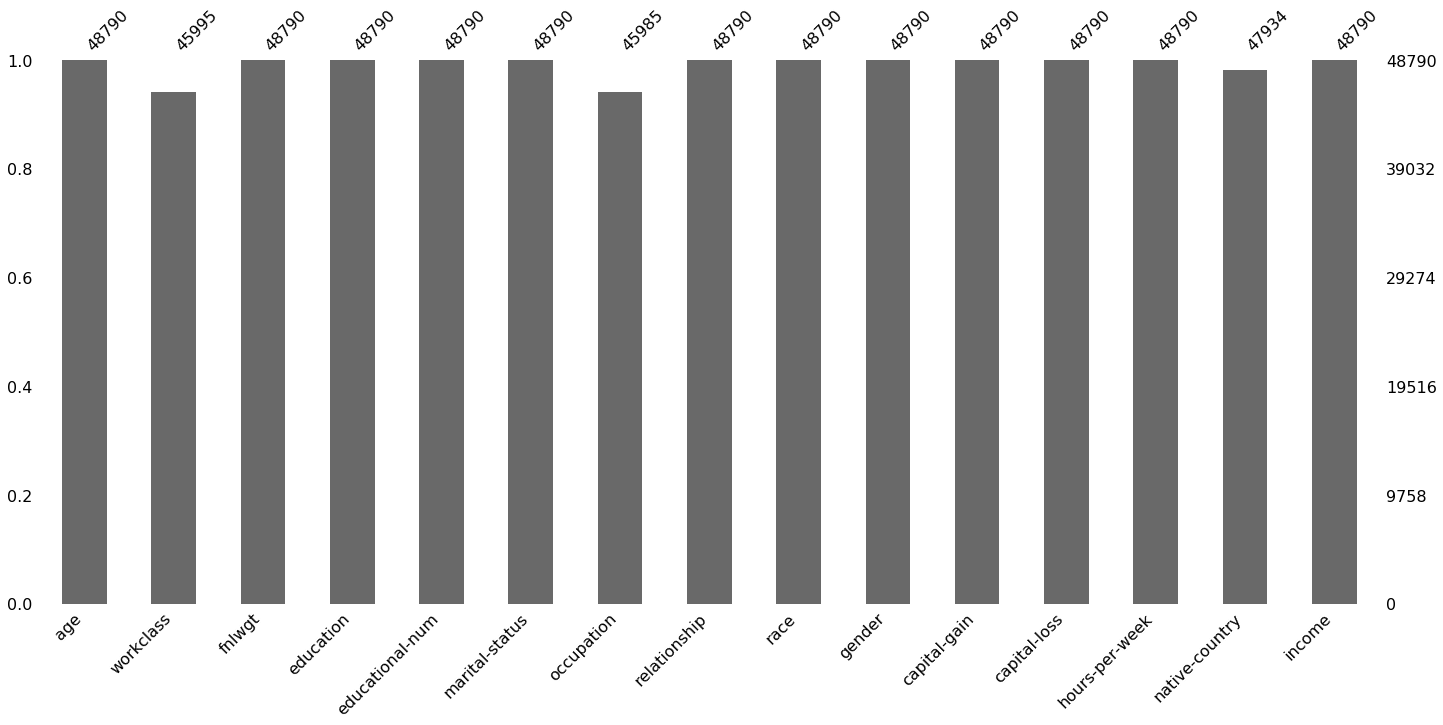

In [8]:
# Verificar los datos perdidos a través de missingno
import missingno as msgn

msgn.bar(clean_df)

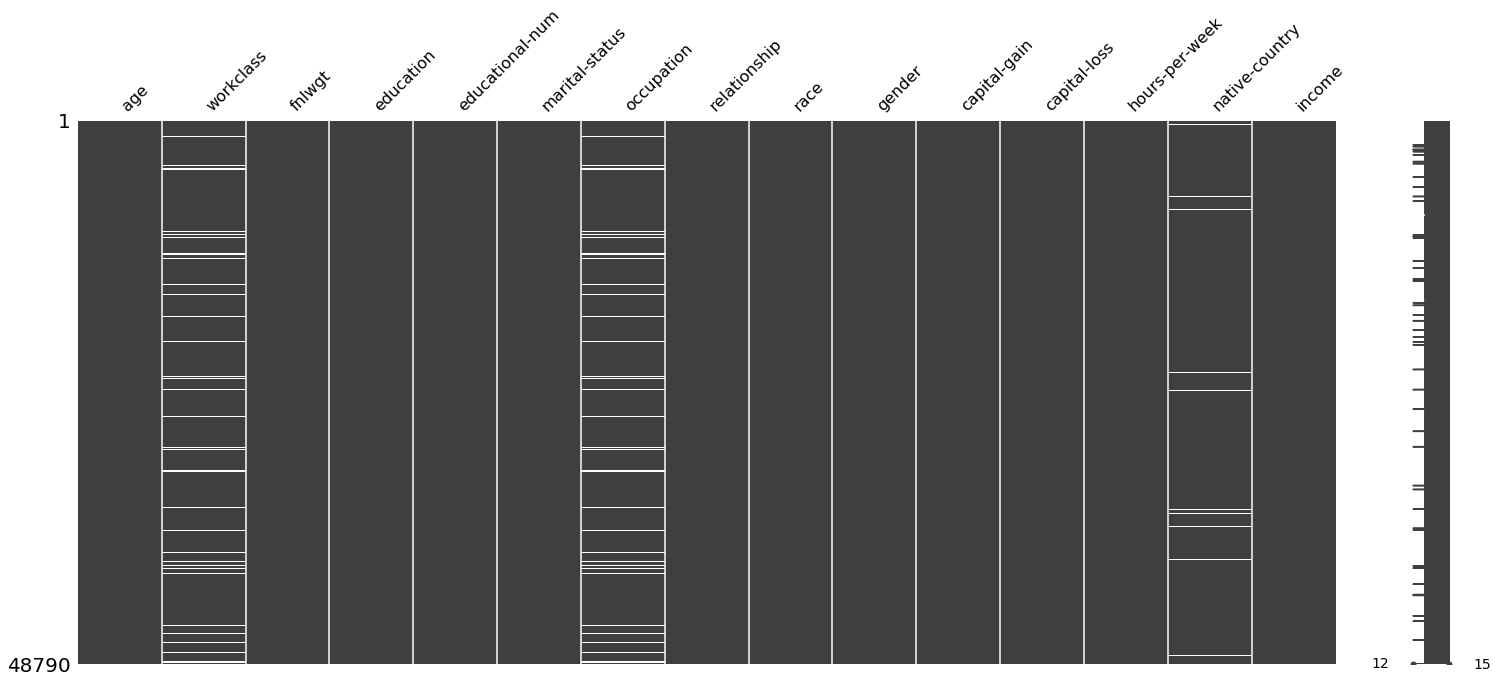

In [9]:
msgn.matrix(clean_df)

In [10]:
# Se eliminan los datos perdidos en un nuevo dataframe
final_df = clean_df.dropna()
final_df.shape

(45175, 15)

In [11]:
final_df.sample(10)

age         workclass  fnlwgt     education  educational-num  \
44846   23           Private  142766  Some-college               10   
47069   67  Self-emp-not-inc  191380   Prof-school               15   
45108   45         Local-gov  206459       Masters               14   
48829   65  Self-emp-not-inc   99359   Prof-school               15   
18395   25           Private   90291     Bachelors               13   
22334   22           Private  203240          10th                6   
46648   18           Private  337046          10th                6   
9705    57           Private   82676       HS-grad                9   
24495   66           Private  217198       HS-grad                9   
5063    68           Private  230904          11th                7   

           marital-status         occupation   relationship   race  gender  \
44846       Never-married       Adm-clerical  Not-in-family  White    Male   
47069  Married-civ-spouse     Prof-specialty        Husband  White    Male   
45108  Married-civ-spouse       Adm-clerical        Husband  White    Male   
48829       Never-married     Prof-specialty  Not-in-family  White    Male   
18395       Never-married    Exec-managerial      Own-child  White    Male   
22334       Never-married       Adm-clerical  Not-in-family  White  Female   
46648       Never-married      Other-service      Own-child  White    Male   
9705             Divorced   Transport-moving  Not-in-family  White    Male   
24495  Married-civ-spouse  Handlers-cleaners        Husband  White    Male   
5063              Widowed  Machine-op-inspct  Not-in-family  Black  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
44846             0             0              20  United-States  <=50K  
47069         20051             0              25  United-States   >50K  
45108             0             0              35  United-States  <=50K  
48829          1086             0              60  United-States  <=50K  
18395             0             0              40  United-States  <=50K  
22334             0             0              40  United-States  <=50K  
46648             0             0              40  United-States  <=50K  
9705              0             0              48  United-States  <=50K  
24495             0             0              10  United-States  <=50K  
5063              0          1870              35  United-States  <=50K

#### 2. Recodificación de variables.

In [12]:
# Recodificación de 'occupation'
final_df['occupation'].value_counts()

Craft-repair         6010
Prof-specialty       6001
Exec-managerial      5980
Adm-clerical         5535
Sales                5405
Other-service        4805
Machine-op-inspct    2965
Transport-moving     2316
Handlers-cleaners    2045
Farming-fishing      1475
Tech-support         1419
Protective-serv       975
Priv-house-serv       230
Armed-Forces           14
Name: occupation, dtype: int64

In [13]:
# Se crea un diccionario para recodificar
collar_group = {'white_collar':['Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Tech-support'],
               'blue_collar':['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv'],
               'others':['Other-service', 'Armed-Forces']}

In [14]:
# Recodificación
for v in collar_group:
    final_df.loc[final_df['occupation'].isin(collar_group[v]), 'collars'] = v
final_df.loc[:,['occupation','collars']].head(10)

occupation       collars
0   Machine-op-inspct   blue_collar
1     Farming-fishing   blue_collar
2     Protective-serv   blue_collar
3   Machine-op-inspct   blue_collar
5       Other-service        others
7      Prof-specialty  white_collar
8       Other-service        others
9        Craft-repair   blue_collar
10  Machine-op-inspct   blue_collar
11       Adm-clerical  white_collar

In [15]:
# Recodificación de 'workclass'
# Se evalua la frecuencia
final_df['workclass'].value_counts()

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [16]:
# Se crea un diccionario para recodificar
workclass_group = {'federal_gov':['Federal-gov'],
                   'state_level_gov':['State-gov', 'Local-gov'],
                   'self_employed':['Self-emp-inc', 'Self-emp-not-inc'],
                   'unemployed':['Never-worked', 'Without-pay'],
                   'private':['Private']}

In [17]:
# Recodificación
for v in workclass_group:
    final_df.loc[final_df['workclass'].isin(workclass_group[v]), 'workclass_recod'] = v
final_df.loc[:,['workclass','workclass_recod']].head(10)

workclass  workclass_recod
0            Private          private
1            Private          private
2          Local-gov  state_level_gov
3            Private          private
5            Private          private
7   Self-emp-not-inc    self_employed
8            Private          private
9            Private          private
10           Private          private
11       Federal-gov      federal_gov

In [18]:
# Recodificación de 'education'
# Se evalua la frecuencia
final_df['education'].value_counts()

HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: education, dtype: int64

In [19]:
# Se crea un diccionario para recodificar
educ_recod = {'preschool':['Preschool'],
              'elementary_school':['1st-4th', '5th-6th'],
              'high_school': ['7th-8th', '9th', '10th', '11th', '12th', 'HS-grad'],
              'college': ['Assoc-voc', 'Assoc-acdm', 'Some-college'],
              'university': ['Bachelors', 'Masters', 'Prof-school', 'Doctorate']}

In [20]:
# Recodificación
for v in educ_recod:
    final_df.loc[final_df['education'].isin(educ_recod[v]), 'educ_recod'] = v
final_df.loc[:,['education','educ_recod']].head(10)

education   educ_recod
0           11th  high_school
1        HS-grad  high_school
2     Assoc-acdm      college
3   Some-college      college
5           10th  high_school
7    Prof-school   university
8   Some-college      college
9        7th-8th  high_school
10       HS-grad  high_school
11     Bachelors   university

In [21]:
# Recodificación de 'marital-status'
# Se evalua la frecuencia
final_df['marital-status'].value_counts()

Married-civ-spouse       21042
Never-married            14567
Divorced                  6294
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [22]:
# Se crea un diccionario para recodificar
civstatus = {'married' : ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AFspouse'],
             'divorced' : ['Divorced'],
             'separated' : ['Separated'],
             'widowed' : ['Widowed'],
             'single': ['Never-married']}

In [23]:
# Recodificación
for v in civstatus:
    final_df.loc[final_df['marital-status'].isin(civstatus[v]), 'civstatus'] = v
final_df.loc[:,['marital-status','civstatus']].head(10)

marital-status civstatus
0        Never-married    single
1   Married-civ-spouse   married
2   Married-civ-spouse   married
3   Married-civ-spouse   married
5        Never-married    single
7   Married-civ-spouse   married
8        Never-married    single
9   Married-civ-spouse   married
10  Married-civ-spouse   married
11  Married-civ-spouse   married

In [24]:
# Recodificación de 'native-country'
# Se evalúa la frecuencia 
final_df['native-country'].value_counts()

United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [25]:
# Se crea un diccionario para recodificar
region = {'America':['Outlying-US(Guam-USVI-etc)','Trinadad&Tobago','Ecuador','Jamaica','Nicaragua','Honduras','Canada','United-States','Peru','Guatemala','Mexico','Dominican-Republic','Haiti','El-Salvador','Puerto-Rico','Columbia','Cuba'],
         'Africa':['Congo'],
         'Europe':['Holand-Netherlands','France','Greece','Hungary','Yugoslavia','Scotland','Ireland','Germany','Poland','England','Italy','Portugal'],
         'Asia':['Hong','Iran','Philippines','Thailand','Vietnam','South','Japan','India','Cambodia','Laos','Taiwan','China'],
         'Oceania':['Australia']}

In [26]:
# Recodificación
for v in region:
    final_df.loc[final_df['native-country'].isin(region[v]), 'region'] = v
final_df.loc[:,['native-country','region']].sample(10)

native-country   region
23828  United-States  America
37229  United-States  America
16259  United-States  America
16113  United-States  America
16381  United-States  America
25908         Mexico  America
41531  United-States  America
4819   United-States  America
29025  United-States  America
31632  United-States  America

In [27]:
# Recodificación de 'income'
# Se evalúa la frecuencia 
final_df['income'].value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

In [28]:
# En este caso, se evalúa en '1' la opción con menor frecuencia
final_df['income_recod'] = np.where(final_df['income'].str.strip() == '>50K', 1, 0)
final_df.sample(10)

age         workclass  fnlwgt    education  educational-num  \
44401   35           Private  196178      HS-grad                9   
23501   27           Private  220754    Doctorate               16   
33184   40       Federal-gov  121012    Bachelors               13   
15103   44           Private   56651   Assoc-acdm               12   
28675   50         State-gov  289207    Doctorate               16   
16439   29           Private  191535      HS-grad                9   
43232   56           Private  164332      HS-grad                9   
34691   43  Self-emp-not-inc   38876      HS-grad                9   
5493    45  Self-emp-not-inc   87490  Prof-school               15   
16512   41           Private  130408      HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
44401  Married-civ-spouse       Craft-repair        Husband  White    Male   
23501       Never-married       Adm-clerical      Own-child  White  Female   
33184  Married-civ-spouse       Adm-clerical        Husband  White    Male   
15103  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
28675  Married-civ-spouse     Prof-specialty        Husband  White    Male   
16439            Divorced       Craft-repair  Not-in-family  White    Male   
43232  Married-civ-spouse              Sales           Wife  White  Female   
34691  Married-civ-spouse    Farming-fishing        Husband  White    Male   
5493   Married-civ-spouse     Prof-specialty        Husband  White    Male   
16512            Divorced              Sales      Unmarried  Black  Female   

       ...  capital-loss  hours-per-week  native-country income       collars  \
44401  ...             0              40   United-States  <=50K   blue_collar   
23501  ...             0              40   United-States  <=50K  white_collar   
33184  ...             0              48   United-States   >50K  white_collar   
15103  ...             0              42   United-States  <=50K   blue_collar   
28675  ...          1902              45   United-States   >50K  white_collar   
16439  ...             0              60   United-States  <=50K   blue_collar   
43232  ...             0              15   United-States  <=50K  white_collar   
34691  ...             0              50   United-States  <=50K   blue_collar   
5493   ...          1977              50   United-States   >50K  white_collar   
16512  ...             0              38   United-States  <=50K  white_collar   

       workclass_recod   educ_recod civstatus   region income_recod  
44401          private  high_school   married  America            0  
23501          private   university    single  America            0  
33184      federal_gov   university   married  America            1  
15103          private      college   married  America            0  
28675  state_level_gov   university   married  America            1  
16439          private  high_school  divorced  America            0  
43232          private  high_school   married  America            0  
34691    self_employed  high_school   married  America            0  
5493     self_employed   university   married  America            1  
16512          private  high_school  divorced  America            0  

[10 rows x 21 columns]

#### 3. Inspección visual del vector objetivo.

In [29]:
# Se importan las librerias para visualizar
import matplotlib.pyplot as plt
import seaborn as sns

# Se definen los parámetros de los gráficos
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (5,3)

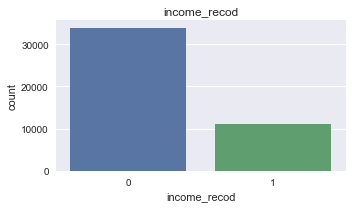

In [30]:
fx.inspeccion_variable(final_df, var='income_recod')

#### 4. Inspección visual de las variables.

In [31]:
final_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'collars', 'workclass_recod', 'educ_recod', 'civstatus',
       'region', 'income_recod'],
      dtype='object')

In [32]:
# Se crea una lista con las variables a inspeccionar
variables = ['age', 'workclass_recod', 'educ_recod', 'educational-num',
       'civstatus', 'collars', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'region', 'income_recod']

# Describo las variables para identificar su tipo
for i in variables:
    print(f'\nVariable: {i}\n')
    print(final_df[i].describe())


Variable: age

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

Variable: workclass_recod

count       45175
unique          5
top       private
freq        33262
Name: workclass_recod, dtype: object

Variable: educ_recod

count           45175
unique              5
top       high_school
freq            19685
Name: educ_recod, dtype: object

Variable: educational-num

count    45175.000000
mean        10.119314
std          2.551740
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: educational-num, dtype: float64

Variable: civstatus

count       45143
unique          5
top       married
freq        21594
Name: civstatus, dtype: object

Variable: collars

count            45175
unique               3
top       white_collar
freq             24340
Name: collars, dtype: o

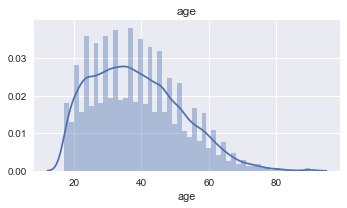

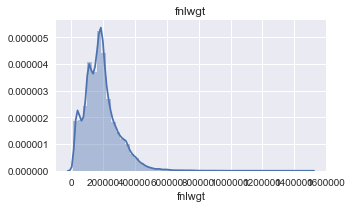

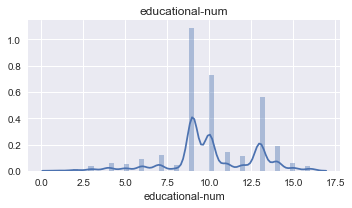

In [33]:
# Se grafican las variables continuas
var_cont = ['age','fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for v in var_cont:
    fx.inspeccion_variable(final_df, v)

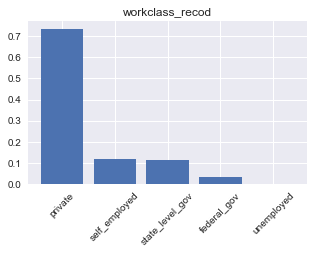

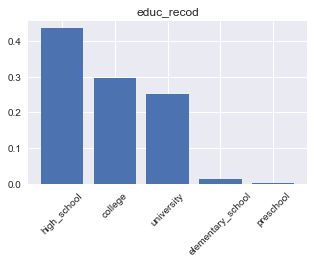

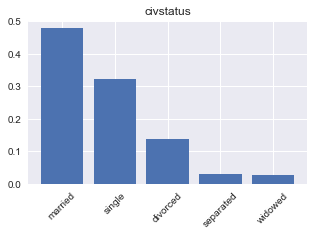

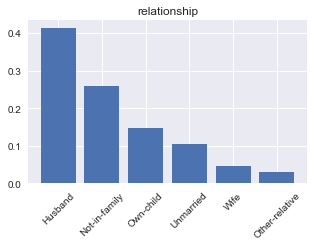

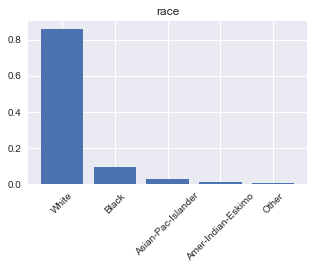

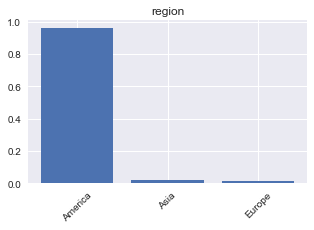

In [34]:
# Se grafican las variables categoricas
var_cat = ['workclass_recod', 'educ_recod', 'civstatus', 'collars', 'relationship', 'race', 'gender', 'region', 'income_recod']

for v in var_cat:
    fx.graf_var_categorica(final_df,v)


___

### Hito 3

#### Modelación descriptiva.

A continuación se busca determinar cuáles son los principales determinantes para el vector objetivo, lo que nos permitirá refactorizar el modelo para mejorar el desempeño del modelo.



In [35]:
# Revisaremos la correlación entre las variables
plt.figure(figsize=(10,8))
sns.heatmap(final_df.corr(), cmap='Greens', annot=True);

__Observación:__ Lo que debemos hacer es binarizar todas las variables para poder comprender cuáles son las que nos permitirán determinar de mejor manera el salario de un individuo.

In [36]:
final_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'collars', 'workclass_recod', 'educ_recod', 'civstatus',
       'region', 'income_recod'],
      dtype='object')

In [37]:
# Antes de binarizar las variables se deben los '-' por '_' en el nombre de las columnas
final_df.rename(columns={'marital-status':'marital_status',
                       'native-country':'native_country',
                        'capital-gain':'capital_gain',
                        'capital-loss':'capital_loss',
                         'hours-per-week':'hours_per_week',
                         'educational-num':'educational_num'
                        }, inplace=True)
final_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'collars', 'workclass_recod', 'educ_recod', 'civstatus',
       'region', 'income_recod'],
      dtype='object')

In [38]:
final_df.sample(10)

age    workclass  fnlwgt     education  educational_num  \
8745    26      Private  214303       HS-grad                9   
14782   21      Private  311570    Assoc-acdm               12   
35061   26      Private  142506     Bachelors               13   
2678    24      Private  209034       HS-grad                9   
31107   56      Private  343849  Some-college               10   
24745   30      Private  156025       HS-grad                9   
6411    28      Private  185896  Some-college               10   
16334   50  Federal-gov  251585     Bachelors               13   
43986   38      Private  374524  Some-college               10   
16498   38      Private  182609     Bachelors               13   

           marital_status         occupation   relationship  \
8745        Never-married      Other-service      Unmarried   
14782       Never-married       Tech-support      Own-child   
35061       Never-married     Prof-specialty      Unmarried   
2678        Never-married              Sales  Not-in-family   
31107  Married-civ-spouse   Transport-moving        Husband   
24745            Divorced    Exec-managerial      Unmarried   
6411        Never-married  Handlers-cleaners  Not-in-family   
16334            Divorced    Exec-managerial  Not-in-family   
43986       Never-married   Transport-moving  Not-in-family   
16498  Married-civ-spouse              Sales        Husband   

                     race  gender  ...  capital_loss  hours_per_week  \
8745                White  Female  ...             0              20   
14782               White  Female  ...             0              35   
35061               Black  Female  ...             0              35   
2678                White  Female  ...             0              50   
31107               Black    Male  ...             0              40   
24745               White  Female  ...             0              40   
6411   Amer-Indian-Eskimo    Male  ...             0              47   
16334               White    Male  ...             0              55   
43986               White    Male  ...             0              40   
16498               White    Male  ...             0              50   

       native_country income       collars workclass_recod   educ_recod  \
8745    United-States  <=50K        others         private  high_school   
14782   United-States  <=50K  white_collar         private      college   
35061   United-States  <=50K  white_collar         private   university   
2678    United-States  <=50K  white_collar         private  high_school   
31107   United-States  <=50K   blue_collar         private      college   
24745   United-States  <=50K  white_collar         private  high_school   
6411           Mexico  <=50K   blue_collar         private      college   
16334   United-States   >50K  white_collar     federal_gov   university   
43986   United-States  <=50K   blue_collar         private      college   
16498          Poland  <=50K  white_collar         private   university   

      civstatus   region income_recod  
8745     single  America            0  
14782    single  America            0  
35061    single  America            0  
2678     single  America            0  
31107   married  America            0  
24745  divorced  America            0  
6411     single  America            0  
16334  divorced  America            1  
43986    single  America            0  
16498   married   Europe            0  

[10 rows x 21 columns]

In [39]:
# Ahora, binarizaremos las variables categóricas
var_cat

['workclass_recod',
 'educ_recod',
 'civstatus',
 'collars',
 'relationship',
 'race',
 'gender',
 'region',
 'income_recod']

In [40]:
# workclass_recod
final_df['workclass_recod'].value_counts()

private            33262
self_employed       5440
state_level_gov     5046
federal_gov         1406
unemployed            21
Name: workclass_recod, dtype: int64

In [41]:
# Se deben binarizar considerando la ocurrencia con menor frecuencia 
final_df['workclass_Unemployed'] = np.where(final_df['workclass_recod'] == 'unemployed', 1, 0)
final_df['workclass_FederalGov'] = np.where(final_df['workclass_recod'] == 'federal_gov', 1, 0)
final_df['workclass_StateLevelGov'] = np.where(final_df['workclass_recod'] == 'state_level_gov', 1, 0)
final_df['workclass_SelfEmployed'] = np.where(final_df['workclass_recod'] == 'self_employed', 1, 0)
final_df.sample(5)

age         workclass  fnlwgt   education  educational_num  \
21670   42  Self-emp-not-inc  207392     HS-grad                9   
41771   20           Private  225811     HS-grad                9   
4009    43           Private   59460   Bachelors               13   
35605   68           Private  192829  Assoc-acdm               12   
47990   56           Private  437727         9th                5   

           marital_status       occupation   relationship   race  gender  ...  \
21670  Married-civ-spouse            Sales        Husband  White    Male  ...   
41771       Never-married            Sales      Own-child  White  Female  ...   
4009        Never-married            Sales      Own-child  White  Female  ...   
35605            Divorced  Exec-managerial  Not-in-family  White  Female  ...   
47990  Married-civ-spouse            Sales        Husband  White    Male  ...   

            collars  workclass_recod   educ_recod civstatus   region  \
21670  white_collar    self_employed  high_school   married  America   
41771  white_collar          private  high_school    single  America   
4009   white_collar          private   university    single  America   
35605  white_collar          private      college  divorced  America   
47990  white_collar          private  high_school   married  America   

      income_recod workclass_Unemployed workclass_FederalGov  \
21670            0                    0                    0   
41771            0                    0                    0   
4009             0                    0                    0   
35605            0                    0                    0   
47990            0                    0                    0   

      workclass_StateLevelGov workclass_SelfEmployed  
21670                       0                      1  
41771                       0                      0  
4009                        0                      0  
35605                       0                      0  
47990                       0                      0  

[5 rows x 25 columns]

In [42]:
# educ_recod
final_df['educ_recod'].value_counts()

high_school          19685
college              13352
university           11401
elementary_school      667
preschool               70
Name: educ_recod, dtype: int64

In [43]:
final_df['educ_preschool'] = np.where(final_df['educ_recod'] == 'preschool', 1, 0)
final_df['educ_elementary_school'] = np.where(final_df['educ_recod'] == 'elementary_school', 1, 0)
final_df['educ_university'] = np.where(final_df['educ_recod'] == 'university', 1, 0)
final_df['educ_college'] = np.where(final_df['educ_recod'] == 'college', 1, 0)
final_df.sample(5)

age  workclass  fnlwgt     education  educational_num  \
15620   36    Private  108320       HS-grad                9   
41507   43    Private  185057       HS-grad                9   
12909   45    Private   92374  Some-college               10   
25635   49    Private  180532       Masters               14   
18137   44  State-gov   55076       Masters               14   

              marital_status        occupation   relationship   race  gender  \
15620               Divorced  Transport-moving      Own-child  White    Male   
41507               Divorced   Exec-managerial  Not-in-family  White  Female   
12909          Never-married   Exec-managerial  Not-in-family  Other    Male   
25635  Married-spouse-absent    Prof-specialty  Not-in-family  White    Male   
18137          Never-married    Prof-specialty  Not-in-family  White  Female   

       ...   region  income_recod  workclass_Unemployed workclass_FederalGov  \
15620  ...  America             0                     0                    0   
41507  ...  America             1                     0                    0   
12909  ...     Asia             1                     0                    0   
25635  ...  America             0                     0                    0   
18137  ...  America             0                     0                    0   

      workclass_StateLevelGov workclass_SelfEmployed educ_preschool  \
15620                       0                      0              0   
41507                       0                      0              0   
12909                       0                      0              0   
25635                       0                      0              0   
18137                       1                      0              0   

      educ_elementary_school educ_university educ_college  
15620                      0               0            0  
41507                      0               0            0  
12909                      0               0            1  
25635                      0               1            0  
18137                      0               1            0  

[5 rows x 29 columns]

In [44]:
# civstatus
final_df['civstatus'].value_counts()

married      21594
single       14567
divorced      6294
separated     1411
widowed       1277
Name: civstatus, dtype: int64

In [45]:
final_df['civstatus_widowed'] = np.where(final_df['civstatus'] == 'widowed', 1, 0)
final_df['civstatus_separated'] = np.where(final_df['civstatus'] == 'separated', 1, 0)
final_df['civstatus_divorced'] = np.where(final_df['civstatus'] == 'divorced', 1, 0)
final_df['civstatus_single'] = np.where(final_df['civstatus'] == 'single', 1, 0)
final_df.sample(5)

age         workclass  fnlwgt     education  educational_num  \
43661   43           Private  221172     Bachelors               13   
40190   22           Private  113760          11th                7   
1165    46           Private  224582  Some-college               10   
38593   37  Self-emp-not-inc  138940          11th                7   
45908   36  Self-emp-not-inc   34180       HS-grad                9   

      marital_status         occupation   relationship   race  gender  ...  \
43661       Divorced    Exec-managerial  Not-in-family  White    Male  ...   
40190  Never-married      Other-service      Own-child  White  Female  ...   
1165   Never-married  Machine-op-inspct  Not-in-family  White  Female  ...   
38593  Never-married    Farming-fishing      Own-child  White    Male  ...   
45908  Never-married    Farming-fishing  Not-in-family  White    Male  ...   

       workclass_StateLevelGov  workclass_SelfEmployed  educ_preschool  \
43661                        0                       0               0   
40190                        0                       0               0   
1165                         0                       0               0   
38593                        0                       1               0   
45908                        0                       1               0   

      educ_elementary_school educ_university educ_college civstatus_widowed  \
43661                      0               1            0                 0   
40190                      0               0            0                 0   
1165                       0               0            1                 0   
38593                      0               0            0                 0   
45908                      0               0            0                 0   

      civstatus_separated civstatus_divorced civstatus_single  
43661                   0                  1                0  
40190                   0                  0                1  
1165                    0                  0                1  
38593                   0                  0                1  
45908                   0                  0                1  

[5 rows x 33 columns]

In [46]:
# collars
final_df['collars'].value_counts()

white_collar    24340
blue_collar     16016
others           4819
Name: collars, dtype: int64

In [47]:
final_df['collars_others'] = np.where(final_df['collars'] == 'others', 1, 0)
final_df['collars_blue_collar'] = np.where(final_df['collars'] == 'blue_collar', 1, 0)
final_df.sample(5)

age  workclass  fnlwgt     education  educational_num  \
7020    52    Private   42902           9th                5   
30791   38    Private  380543       HS-grad                9   
37040   43    Private  248094       HS-grad                9   
8492    42  State-gov  214781     Bachelors               13   
39772   48    Private  187505  Some-college               10   

           marital_status      occupation   relationship   race  gender  ...  \
7020            Separated   Other-service  Not-in-family  Black    Male  ...   
30791       Never-married   Other-service      Unmarried  Black  Female  ...   
37040            Divorced    Craft-repair      Unmarried  White    Male  ...   
8492        Never-married  Prof-specialty      Unmarried  White    Male  ...   
39772  Married-civ-spouse           Sales        Husband  White    Male  ...   

       educ_preschool  educ_elementary_school  educ_university educ_college  \
7020                0                       0                0            0   
30791               0                       0                0            0   
37040               0                       0                0            0   
8492                0                       0                1            0   
39772               0                       0                0            1   

      civstatus_widowed civstatus_separated civstatus_divorced  \
7020                  0                   1                  0   
30791                 0                   0                  0   
37040                 0                   0                  1   
8492                  0                   0                  0   
39772                 0                   0                  0   

      civstatus_single collars_others collars_blue_collar  
7020                 0              1                   0  
30791                1              1                   0  
37040                0              0                   1  
8492                 1              0                   0  
39772                0              0                   0  

[5 rows x 35 columns]

In [48]:
# relationship
final_df['relationship'].value_counts()

Husband           18653
Not-in-family     11679
Own-child          6616
Unmarried          4787
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

In [49]:
final_df['relationship_Other_relative'] = np.where(final_df['relationship'] == 'Other-relative', 1, 0)
final_df['relationship_Wife'] = np.where(final_df['relationship'] == 'Wife', 1, 0)
final_df['relationship_Unmarried'] = np.where(final_df['relationship'] == 'Unmarried', 1, 0)
final_df['relationship_Own_child'] = np.where(final_df['relationship'] == 'Own-child', 1, 0)
final_df['relationship_Not_in_family'] = np.where(final_df['relationship'] == 'Not-in-family', 1, 0)
final_df.sample(5)

age         workclass  fnlwgt     education  educational_num  \
3735    26  Self-emp-not-inc  334267  Some-college               10   
39311   18         Local-gov  146586       HS-grad                9   
7861    48           Private  233511       HS-grad                9   
45182   59           Private  279636       HS-grad                9   
1323    33           Private  392812       Masters               14   

           marital_status       occupation   relationship   race gender  ...  \
3735        Never-married  Farming-fishing  Not-in-family  White   Male  ...   
39311       Never-married    Other-service      Own-child  White   Male  ...   
7861   Married-civ-spouse     Craft-repair        Husband  White   Male  ...   
45182       Never-married     Adm-clerical  Not-in-family  White   Male  ...   
1323   Married-civ-spouse  Exec-managerial        Husband  White   Male  ...   

       civstatus_separated  civstatus_divorced  civstatus_single  \
3735                     0                   0                 1   
39311                    0                   0                 1   
7861                     0                   0                 0   
45182                    0                   0                 1   
1323                     0                   0                 0   

      collars_others collars_blue_collar relationship_Other_relative  \
3735               0                   1                           0   
39311              1                   0                           0   
7861               0                   1                           0   
45182              0                   0                           0   
1323               0                   0                           0   

      relationship_Wife relationship_Unmarried relationship_Own_child  \
3735                  0                      0                      0   
39311                 0                      0                      1   
7861                  0                      0                      0   
45182                 0                      0                      0   
1323                  0                      0                      0   

      relationship_Not_in_family  
3735                           1  
39311                          0  
7861                           0  
45182                          1  
1323                           0  

[5 rows x 40 columns]

In [50]:
# race
final_df['race'].value_counts()

White                 38859
Black                  4227
Asian-Pac-Islander     1301
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [51]:
final_df['race_Other'] = np.where(final_df['race'] == 'Other', 1, 0)
final_df['race_Amer_Indian_Eskimo'] = np.where(final_df['race'] == 'Amer-Indian-Eskimo', 1, 0)
final_df['race_Asian_Pac_Islander'] = np.where(final_df['race'] == 'Asian-Pac-Islander', 1, 0)
final_df['race_Black'] = np.where(final_df['race'] == 'Black', 1, 0)
final_df.sample(5)

age         workclass  fnlwgt education  educational_num  \
11532   44         Local-gov  112763   Masters               14   
48784   47           Private  312088   HS-grad                9   
27936   46       Federal-gov  325573   HS-grad                9   
45921   35  Self-emp-not-inc  188540       9th                5   
44810   19           Private  224849   HS-grad                9   

           marital_status         occupation   relationship   race  gender  \
11532            Divorced     Prof-specialty      Unmarried  White  Female   
48784  Married-civ-spouse       Craft-repair        Husband  White    Male   
27936       Never-married  Handlers-cleaners  Not-in-family  White    Male   
45921  Married-civ-spouse       Craft-repair        Husband  White    Male   
44810       Never-married              Sales  Not-in-family  White    Male   

       ...  collars_blue_collar  relationship_Other_relative  \
11532  ...                    0                            0   
48784  ...                    1                            0   
27936  ...                    1                            0   
45921  ...                    1                            0   
44810  ...                    0                            0   

       relationship_Wife relationship_Unmarried relationship_Own_child  \
11532                  0                      1                      0   
48784                  0                      0                      0   
27936                  0                      0                      0   
45921                  0                      0                      0   
44810                  0                      0                      0   

      relationship_Not_in_family race_Other race_Amer_Indian_Eskimo  \
11532                          0          0                       0   
48784                          0          0                       0   
27936                          1          0                       0   
45921                          0          0                       0   
44810                          1          0                       0   

      race_Asian_Pac_Islander race_Black  
11532                       0          0  
48784                       0          0  
27936                       0          0  
45921                       0          0  
44810                       0          0  

[5 rows x 44 columns]

In [52]:
# gender
final_df['gender'].value_counts()

Male      30495
Female    14680
Name: gender, dtype: int64

In [53]:
final_df['gender_Female'] = np.where(final_df['gender'] == 'Female', 1, 0)
final_df.sample(5)

age         workclass  fnlwgt     education  educational_num  \
6696    56           Private  253854  Some-college               10   
31033   28           Private   91299     Assoc-voc               11   
12840   42           Private  179533       HS-grad                9   
11353   39  Self-emp-not-inc  198841     Bachelors               13   
38402   54  Self-emp-not-inc   91506  Some-college               10   

           marital_status      occupation   relationship                race  \
6696   Married-civ-spouse  Prof-specialty        Husband               White   
31033       Never-married    Adm-clerical  Not-in-family  Asian-Pac-Islander   
12840  Married-civ-spouse    Craft-repair        Husband               White   
11353  Married-civ-spouse  Prof-specialty        Husband               White   
38402  Married-civ-spouse           Sales        Husband               White   

       gender  ...  relationship_Other_relative  relationship_Wife  \
6696     Male  ...                            0                  0   
31033  Female  ...                            0                  0   
12840    Male  ...                            0                  0   
11353    Male  ...                            0                  0   
38402    Male  ...                            0                  0   

       relationship_Unmarried relationship_Own_child  \
6696                        0                      0   
31033                       0                      0   
12840                       0                      0   
11353                       0                      0   
38402                       0                      0   

      relationship_Not_in_family race_Other race_Amer_Indian_Eskimo  \
6696                           0          0                       0   
31033                          1          0                       0   
12840                          0          0                       0   
11353                          0          0                       0   
38402                          0          0                       0   

      race_Asian_Pac_Islander race_Black gender_Female  
6696                        0          0             0  
31033                       1          0             1  
12840                       0          0             0  
11353                       0          0             0  
38402                       0          0             0  

[5 rows x 45 columns]

In [54]:
# region
final_df['region'].value_counts()

America    43407
Asia        1030
Europe       738
Name: region, dtype: int64

In [55]:
final_df['region_Europe'] = np.where(final_df['region'] == 'Europe', 1, 0)
final_df['region_Asia'] = np.where(final_df['region'] == 'Asia', 1, 0)
final_df.sample(5)

age  workclass  fnlwgt     education  educational_num  \
46179   53    Private  152657          10th                6   
21477   40  State-gov  506329     Doctorate               16   
11951   32    Private   37070       HS-grad                9   
26729   64    Private  379062  Some-college               10   
32507   18    Private  205894          11th                7   

           marital_status         occupation   relationship  \
46179  Married-civ-spouse       Craft-repair        Husband   
21477  Married-civ-spouse     Prof-specialty        Husband   
11951       Never-married  Machine-op-inspct  Not-in-family   
26729             Widowed       Adm-clerical      Unmarried   
32507       Never-married              Sales      Own-child   

                     race  gender  ...  relationship_Unmarried  \
46179               Black    Male  ...                       0   
21477  Asian-Pac-Islander    Male  ...                       0   
11951               White    Male  ...                       0   
26729               White  Female  ...                       1   
32507               White    Male  ...                       0   

       relationship_Own_child  relationship_Not_in_family race_Other  \
46179                       0                           0          0   
21477                       0                           0          0   
11951                       0                           1          0   
26729                       0                           0          0   
32507                       1                           0          0   

      race_Amer_Indian_Eskimo race_Asian_Pac_Islander race_Black  \
46179                       0                       0          1   
21477                       0                       1          0   
11951                       0                       0          0   
26729                       0                       0          0   
32507                       0                       0          0   

      gender_Female region_Europe region_Asia  
46179             0             0           0  
21477             0             0           1  
11951             0             0           1  
26729             1             0           0  
32507             0             0           0  

[5 rows x 47 columns]

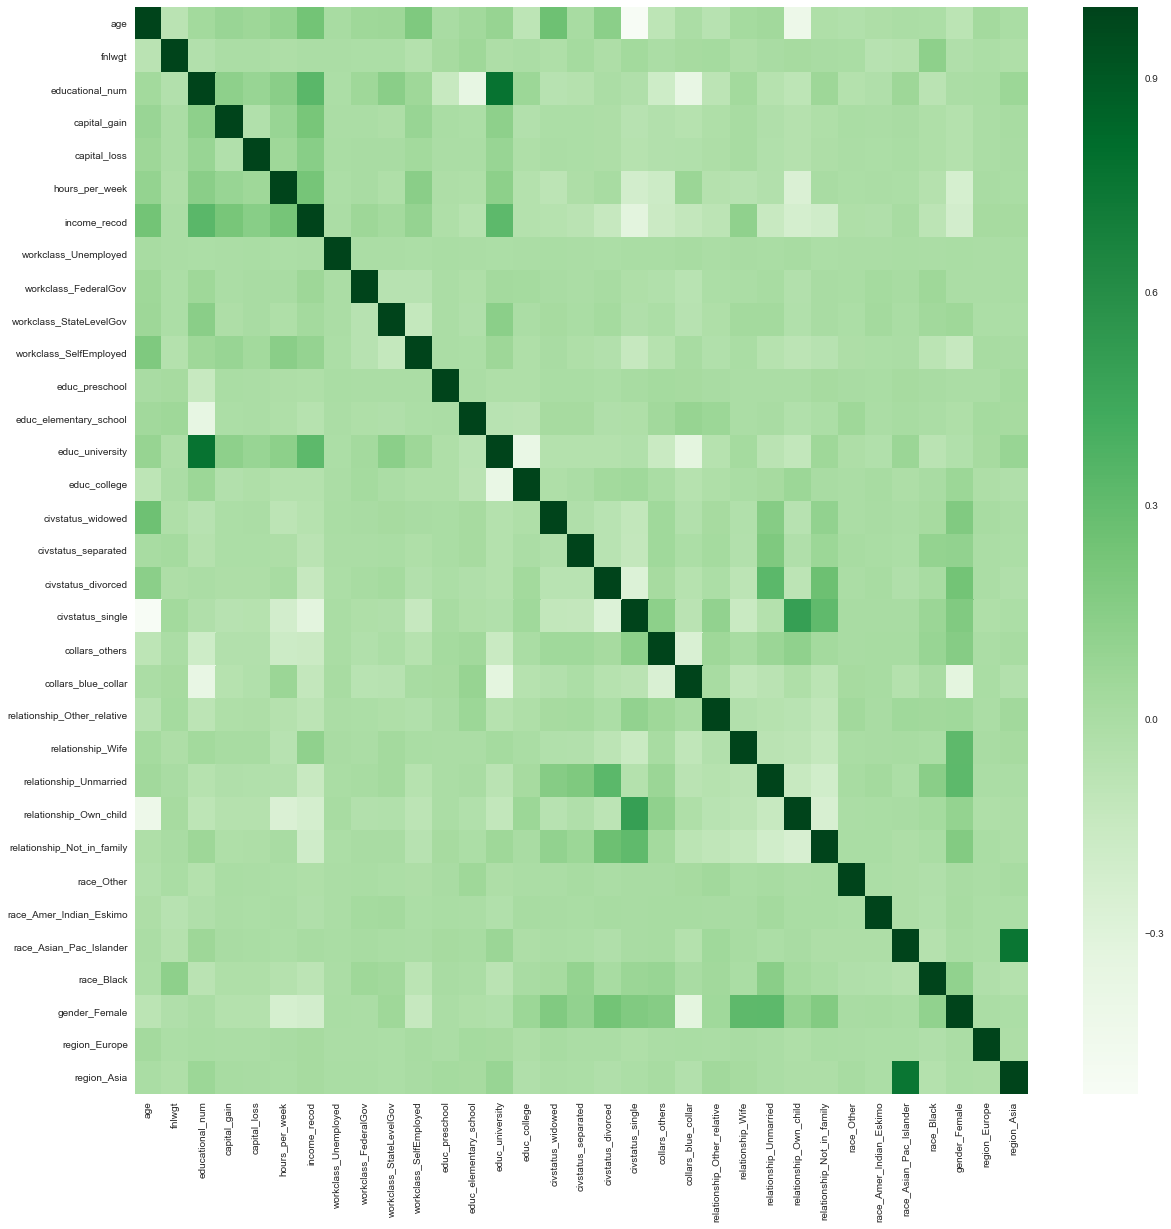

In [56]:
# Validamos nuevamente la correlación
# Revisaremos la correlación entre las variables
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(), cmap='Greens', annot=False);

__Observación:__ Si bien existen correlaciones altas, estan hacen referencia a variables como por ejemplo _estado civil casado_ con _relación: marido/esposa_ o _raza Asiatica_ con _region Asia_. Esto no nos impode seguir con el análisis, dado que no todas las variables siguen una distribución fuertemente normal.

#### Modelamiento

A continuación se construirá un modelo de regresión lineal que nos permitirá observar el comportamiento de las variables.

In [57]:
# Ahora estamos en condiciones de generar el modelo con 'logit'

# Importo statsmodels para generar modelos de regresión
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [58]:
final_df.sample(10)

age    workclass  fnlwgt     education  educational_num  \
17440   20      Private  275691       HS-grad                9   
11181   22    State-gov  194630  Some-college               10   
4342    33    Local-gov  107417       Masters               14   
16672   27      Private  301302     Bachelors               13   
24968   58      Private  201344     Bachelors               13   
36526   41    State-gov  214985       HS-grad                9   
28774   35      Private   31964     Bachelors               13   
6380    67      Private   23580    Assoc-acdm               12   
7490    36  Federal-gov  125933     Bachelors               13   
37172   59      Private  171015  Some-college               10   

           marital_status         occupation   relationship   race  gender  \
17440       Never-married  Handlers-cleaners      Own-child  White    Male   
11181       Never-married     Prof-specialty      Own-child  White    Male   
4342   Married-civ-spouse     Prof-specialty        Husband  White    Male   
16672       Never-married       Craft-repair  Not-in-family  White    Male   
24968            Divorced       Craft-repair      Own-child  White  Female   
36526            Divorced    Exec-managerial  Not-in-family  White  Female   
28774  Married-civ-spouse              Sales        Husband  White    Male   
6380             Divorced       Tech-support  Not-in-family  White  Female   
7490        Never-married     Prof-specialty      Own-child  White    Male   
37172       Never-married       Adm-clerical      Own-child  White  Female   

       ...  relationship_Unmarried  relationship_Own_child  \
17440  ...                       0                       1   
11181  ...                       0                       1   
4342   ...                       0                       0   
16672  ...                       0                       0   
24968  ...                       0                       1   
36526  ...                       0                       0   
28774  ...                       0                       0   
6380   ...                       0                       0   
7490   ...                       0                       1   
37172  ...                       0                       1   

       relationship_Not_in_family race_Other race_Amer_Indian_Eskimo  \
17440                           0          0                       0   
11181                           0          0                       0   
4342                            0          0                       0   
16672                           1          0                       0   
24968                           0          0                       0   
36526                           1          0                       0   
28774                           0          0                       0   
6380                            1          0                       0   
7490                            0          0                       0   
37172                           0          0                       0   

      race_Asian_Pac_Islander race_Black gender_Female region_Europe  \
17440                       0          0             0             0   
11181                       0          0             0             0   
4342                        0          0             0             0   
16672                       0          0             0             0   
24968                       0          0             1             0   
36526                       0          0             1             0   
28774                       0          0             0             0   
6380                        0          0             1             0   
7490                        0          0             0             0   
37172                       0          0             1             0   

      region_Asia  
17440           0  
11181           0  
4342            0  
16672           0  
24968           0  
36526           0  
28774       

In [59]:
# Refactorizamos el dataframe con las variables que evaluaremos en el modelo
final_df = final_df.loc[:,['income_recod', 'age', 'educational_num',
       'capital_gain', 'capital_loss', 'hours_per_week', 
       'workclass_Unemployed',
       'workclass_FederalGov', 'workclass_StateLevelGov',
       'workclass_SelfEmployed', 'educ_preschool', 'educ_elementary_school',
       'educ_university', 'educ_college', 'civstatus_widowed',
       'civstatus_separated', 'civstatus_divorced', 'civstatus_single',
       'collars_others', 'collars_blue_collar', 'relationship_Other_relative',
       'relationship_Wife', 'relationship_Unmarried', 'relationship_Own_child',
       'relationship_Not_in_family', 'race_Other', 'race_Amer_Indian_Eskimo',
       'race_Asian_Pac_Islander', 'race_Black', 'gender_Female',
       'region_Europe','region_Asia']]
final_df.sample(10)

income_recod  age  educational_num  capital_gain  capital_loss  \
26749             0   44               14             0             0   
7027              1   25               13             0             0   
28473             1   33                9             0             0   
37431             1   40               10             0             0   
45573             1   54               10             0          1977   
13630             0   27               10             0             0   
3269              1   49               15         99999             0   
17270             0   51               10          3325             0   
26037             0   36                5             0             0   
25425             0   25               13             0             0   

       hours_per_week  workclass_Unemployed  workclass_FederalGov  \
26749              99                     0                     0   
7027               50                     0                     0   
28473              65                     0                     0   
37431              40                     0                     0   
45573              18                     0                     0   
13630              46                     0                     0   
3269               50                     0                     0   
17270              40                     0                     0   
26037              40                     0                     0   
25425              40                     0                     0   

       workclass_StateLevelGov  workclass_SelfEmployed  ...  \
26749                        0                       1  ...   
7027                         1                       0  ...   
28473                        0                       1  ...   
37431                        0                       0  ...   
45573                        0                       0  ...   
13630                        0                       0  ...   
3269                         0                       1  ...   
17270                        0                       0  ...   
26037                        0                       0  ...   
25425                        0                       0  ...   

       relationship_Unmarried  relationship_Own_child  \
26749                       0                       1   
7027                        0                       0   
28473                       0                       0   
37431                       0                       0   
45573                       0                       0   
13630                       0                       0   
3269                        1                       0   
17270                       0                       0   
26037                       1                       0   
25425                       0                       0   

       relationship_Not_in_family  race_Other  race_Amer_Indian_Eskimo  \
26749                           0           0                        0   
7027                            1           0                        0   
28473                           1           0                        0   
37431                           0           0                        0   
45573                           0           0                        0   
13630                           0           0                        0   
3269                            0           0                        0   
17270                           1           0                        0   
26037                           0           0                        0   
25425                           0           0                        0   

       race_Asian_Pac_Islander  race_Black  gender_Female  region_Europe  \
26749                        0           0              0              0   
7027                         0           0              1              0   
28473                        0           0              0              0   
37

In [60]:
# Genero otro modelo con logit
m_logit = smf.logit('income_recod ~ age + educational_num + capital_gain + capital_loss + hours_per_week + workclass_Unemployed + workclass_FederalGov + workclass_StateLevelGov + workclass_SelfEmployed + educ_preschool + educ_elementary_school + educ_university + educ_college + civstatus_widowed + civstatus_separated + civstatus_divorced + civstatus_single + collars_others + collars_blue_collar + relationship_Other_relative + relationship_Wife + relationship_Unmarried + relationship_Own_child + relationship_Not_in_family + race_Other + race_Amer_Indian_Eskimo + race_Asian_Pac_Islander + race_Black + gender_Female + region_Europe + region_Asia', final_df).fit()
m_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.332099
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Pseudo R-squared:     0.407     
Dependent Variable:     income_recod         AIC:                  30069.1858
Date:                   2019-07-26 23:45     BIC:                  30348.1714
No. Observations:       45175                Log-Likelihood:       -15003.   
Df Model:               31                   LL-Null:              -25302.   
Df Residuals:           45143                LLR p-value:          0.0000    
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         11.0000                                              
-----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------------
Intercept                   -5.4022   0.1714 -31.5245 0.0000  -5.7381 -5.0664
age                          0.0248   0.0014  18.3830 0.0000   0.0222  0.0275
educational_num              0.2759   0.0160  17.1991 0.0000   0.2445  0.3074
capital_gain                 0.0003   0.0000  36.9130 0.0000   0.0003  0.0003
capital_loss                 0.0007   0.0000  21.3143 0.0000   0.0006  0.0007
hours_per_week               0.0295   0.0013  22.3440 0.0000   0.0269  0.0320
workclass_Unemployed        -1.0996   0.8012  -1.3724 0.1699  -2.6699  0.4707
workclass_FederalGov         0.4400   0.0749   5.8719 0.0000   0.2932  0.5869
workclass_StateLevelGov     -0.0753   0.0459  -1.6412 0.1008  -0.1651  0.0146
workclass_SelfEmployed      -0.3482   0.0422  -8.2533 0.0000  -0.4309 -0.2655
educ_preschool              -3.8970   4.0840  -0.9542 0.3400 -11.9015  4.1075
educ_elementary_school       0.2364   0.2232   1.0594 0.2894  -0.2010  0.6738
educ_university              0.1560   0.0860   1.8127 0.0699  -0.0127  0.3246
educ_college                 0.0660   0.0467   1.4130 0.1577  -0.0256  0.1577
civstatus_widowed           -0.7183   0.1759  -4.0843 0.0000  -1.0630 -0.3736
civstatus_separated         -0.8290   0.1781  -4.6536 0.0000  -1.1782 -0.4798
civstatus_divorced          -0.8085   0.1383  -5.8459 0.0000  -1.0796 -0.5375
civstatus_single            -1.2913   0.1366  -9.4522 0.0000  -1.5591 -1.0236
collars_others              -1.3344   0.0858 -15.5603 0.0000  -1.5025 -1.1663
collars_blue_collar         -0.6027   0.0354 -17.0451 0.0000  -0.6720 -0.5334
relationship_Other_relative -1.4151   0.1873  -7.5542 0.0000  -1.7822 -1.0479
relationship_Wife            1.0604   0.0841  12.6128 0.0000   0.8956  1.2252
relationship_Unmarried      -1.1860   0.1504  -7.8864 0.0000  -1.4807 -0.8912
relationship_Own_child      -1.9410   0.1664 -11.6638 0.0000  -2.2671 -1.6148
relationship_Not_in_family  -0.9524   0.1338  -7.1168 0.0000  -1.2147 -0.6901
race_Other                  -0.2640   0.2057  -1.2832 0.1994  -0.6671  0.1392
race_Amer_Indian_Eskimo     -0.5532   0.1794  -3.0840 0.0020  -0.9048 -0.2016
race_Asian_Pac_Islander      0.2635   0.1349   1.9543 0.0507  -0.0008  0.5279
race_Black                  -0.2047   0.0624  -3.2788 0.0010  -0.3270 -0.0823
gender_Female               -0.7894   0.0642 -12.2938 0.0000  -0.9153 -0.6636
region_Europe                0.2009   0.1056   1.9027 0.0571  -0.0061  0.4078
region_Asia                 -0.4925   0.1498  -3.2866 0.0010  -0.7862 -0.1988
=============================================================================

"""

__Observacion:__ Para poder mejorar el desempeño del modelo, debemos refactorizarlo considerando las variables que mejor se ajusten al vector objetivo. Para esto consideraremos las variables que tengan un `p-value` inferior a _0.05_ 

Para obtener las variables que cumplen con la significancia estadística del 95% (p-value < 0.05) utilizaremos la función `get_significance_variables` de nuestras funciones personalizadas.

In [61]:
new_var = fx.get_significance_variables(m_logit)
list(new_var)

['Intercept',
 'age',
 'educational_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_FederalGov',
 'workclass_SelfEmployed',
 'civstatus_widowed',
 'civstatus_separated',
 'civstatus_divorced',
 'civstatus_single',
 'collars_others',
 'collars_blue_collar',
 'relationship_Other_relative',
 'relationship_Wife',
 'relationship_Unmarried',
 'relationship_Own_child',
 'relationship_Not_in_family',
 'race_Amer_Indian_Eskimo',
 'race_Black',
 'gender_Female',
 'region_Asia']

In [62]:
# Ahora refactorizamos el modelo con estas variables
m_logit2 = smf.logit('income_recod ~ age + educational_num + capital_gain + capital_loss + hours_per_week + workclass_FederalGov + workclass_SelfEmployed + civstatus_widowed + civstatus_separated + civstatus_divorced + civstatus_single + collars_others + collars_blue_collar + relationship_Other_relative + relationship_Wife + relationship_Unmarried + relationship_Own_child + relationship_Not_in_family + race_Amer_Indian_Eskimo + race_Black + gender_Female + region_Asia', final_df).fit()
m_logit2.summary2()

Optimization terminated successfully.
         Current function value: 0.332353
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.407     
Dependent Variable:      income_recod        AIC:                 30074.1080
Date:                    2019-07-26 23:45    BIC:                 30274.6289
No. Observations:        45175               Log-Likelihood:      -15014.   
Df Model:                22                  LL-Null:             -25302.   
Df Residuals:            45152               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          9.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                   -5.5635   0.1255 -44.3460 0.0000 -5.8094 -5.3176
age                          0.0247   0.0013  18.4492 0.0000  0.0221  0.0274
educational_num              0.2977   0.0072  41.4745 0.0000  0.2837  0.3118
capital_gain                 0.0003   0.0000  36.9380 0.0000  0.0003  0.0003
capital_loss                 0.0007   0.0000  21.3053 0.0000  0.0006  0.0007
hours_per_week               0.0295   0.0013  22.3589 0.0000  0.0269  0.0321
workclass_FederalGov         0.4526   0.0744   6.0871 0.0000  0.3069  0.5983
workclass_SelfEmployed      -0.3363   0.0415  -8.0987 0.0000 -0.4177 -0.2549
civstatus_widowed           -0.7297   0.1757  -4.1530 0.0000 -1.0741 -0.3853
civstatus_separated         -0.8430   0.1779  -4.7378 0.0000 -1.1918 -0.4943
civstatus_divorced          -0.8195   0.1381  -5.9335 0.0000 -1.0902 -0.5488
civstatus_single            -1.2942   0.1365  -9.4833 0.0000 -1.5617 -1.0267
collars_others              -1.3392   0.0856 -15.6442 0.0000 -1.5070 -1.1714
collars_blue_collar         -0.6145   0.0350 -17.5419 0.0000 -0.6832 -0.5459
relationship_Other_relative -1.4023   0.1874  -7.4816 0.0000 -1.7696 -1.0349
relationship_Wife            1.0588   0.0840  12.6018 0.0000  0.8941  1.2235
relationship_Unmarried      -1.1770   0.1502  -7.8370 0.0000 -1.4713 -0.8826
relationship_Own_child      -1.9263   0.1660 -11.6013 0.0000 -2.2517 -1.6008
relationship_Not_in_family  -0.9409   0.1336  -7.0405 0.0000 -1.2028 -0.6790
race_Amer_Indian_Eskimo     -0.5684   0.1792  -3.1723 0.0015 -0.9195 -0.2172
race_Black                  -0.2148   0.0623  -3.4498 0.0006 -0.3369 -0.0928
gender_Female               -0.7952   0.0641 -12.4014 0.0000 -0.9209 -0.6696
region_Asia                 -0.2716   0.0957  -2.8386 0.0045 -0.4591 -0.0841
============================================================================

"""

__Comentarios:__ Con esto ya estamos en condiciones de entrenar nuestro modelo. Para lo cual calcularemos la chance de ocurrencia (Odds) para una muestra promedio, para posteriormente convertirlo en probabilidad. 
Luego de esto, mediremos el desempeño mediante las métricas __Accuracy__, __Recall__, __F1__ y nos apoyaremos en la __Curva ROC__
____

### Hito 4

#### Modelación predictiva

A continuación se implementará una solución analítica que aumente las métricas de desempeño. Se generarán tres modelos predictivos.

##### Modelo 1
Este modelo lo realizaremos con todas las varibales.

In [63]:
# Importo Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [64]:
# Primero estandarizaremos la matriz de atributos
df_std1 = StandardScaler().fit_transform(final_df.loc[:,'age':'region_Asia'])
df_std1

array([[-1.02580119, -1.22243981, -0.14681116, ..., -0.69382303,
        -0.12887118, -0.15274882],
       [-0.04208565, -0.43865216, -0.14681116, ..., -0.69382303,
        -0.12887118, -0.15274882],
       [-0.79878991,  0.73702932, -0.14681116, ..., -0.69382303,
        -0.12887118, -0.15274882],
       ...,
       [ 1.47132286, -0.43865216, -0.14681116, ...,  1.44128973,
        -0.12887118, -0.15274882],
       [-1.25281247, -0.43865216, -0.14681116, ..., -0.69382303,
        -0.12887118, -0.15274882],
       [ 1.01730031, -0.43865216,  1.85367705, ...,  1.44128973,
        -0.12887118, -0.15274882]])

In [65]:
# Genero los subconjuntos de entrenamiento
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_std1,
                                                   final_df['income_recod'],
                                                   test_size=.33,
                                                   random_state=16254)

In [66]:
# Implemento el modelo
def_model1 = LogisticRegression().fit(X_train1, y_train1)

In [67]:
# Los coeficientes de cada variable
def_model1.coef_

array([[ 0.33246673,  0.6689453 ,  2.41461085,  0.26661558,  0.35711451,
        -0.00774708,  0.0713474 , -0.02388975, -0.11600847, -0.45366433,
        -0.00338456,  0.10175166,  0.02798151, -0.13226289, -0.15215776,
        -0.28998497, -0.62310287, -0.39572912, -0.28820867, -0.22564125,
         0.20247489, -0.36252519, -0.66576754, -0.44049565, -0.03360079,
        -0.07113523,  0.03590005, -0.07219165, -0.3328622 ,  0.01786308,
        -0.05517434]])

In [68]:
# Genero las predicciones de clases
yhat1 = def_model1.predict(X_test1)
yhat1

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
# Genero las predicciones de probabilidad
yhat_pr1 = def_model1.predict_proba(X_test1)
yhat_pr1

array([[0.88999281, 0.11000719],
       [0.95589658, 0.04410342],
       [0.75809179, 0.24190821],
       ...,
       [0.87783766, 0.12216234],
       [0.97138725, 0.02861275],
       [0.66266658, 0.33733342]])

In [70]:
#Matriz de confusión
m_confusion = confusion_matrix(y_test1, yhat1)
ax = plt.subplot()
sns.heatmap(m_confusion, annot=True, cmap='Blues', ax = ax, fmt='g');
ax.set_xlabel('y_Predicted');ax.set_ylabel('y_Actual');
ax.set_title('Confusion Matrix (Modelo 1)', size='xx-large');
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [71]:
# Reporto las métricas para las clases
print(classification_report(y_test1, yhat1))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11249
           1       0.73      0.59      0.65      3659

    accuracy                           0.85     14908
   macro avg       0.80      0.76      0.78     14908
weighted avg       0.84      0.85      0.84     14908



Text(0.5, 1.0, 'AUC = 0.899')

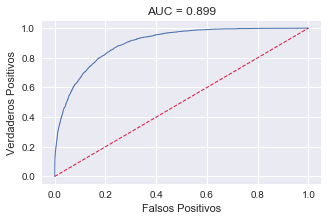

In [72]:
# Grafico la curva ROC
false_positive1, true_positive1, threshold1 = roc_curve(y_test1, yhat_pr1[:,1])
plt.plot(false_positive1, true_positive1, lw=1)
plt.plot([0,1], linestyle='--', lw=1, color='crimson')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
plt.title(f'AUC = {round(roc_auc_score(y_test1, yhat_pr1[:,1]),3)}')

__Comentario:__ La curva nos entrega que tenemos una mejora de casi un 40% respecto al clasificador aleatorio.

##### Modelo 2

Este modelo lo realizaremos con las variables que presentan un mejor ajuste al vector objetivo.

In [73]:
# Generamos un nuevo dataframe con las variables a evaluar
df_2 = final_df.loc[:,['income_recod', 'age', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week',
                        'workclass_FederalGov', 'workclass_SelfEmployed', 'civstatus_widowed', 'civstatus_separated',
                        'civstatus_divorced', 'civstatus_single', 'collars_others', 'collars_blue_collar',
                        'relationship_Other_relative', 'relationship_Wife', 'relationship_Unmarried',
                        'relationship_Own_child', 'relationship_Not_in_family', 'race_Amer_Indian_Eskimo',
                        'race_Black', 'gender_Female', 'region_Asia']]
df_2.sample(10)

income_recod  age  educational_num  capital_gain  capital_loss  \
43139             0   66               13             0             0   
25213             0   22               10             0             0   
31664             0   55               13             0             0   
16782             0   62                9             0             0   
15731             0   22                5             0             0   
9363              0   19                9             0             0   
4002              0   51                9             0             0   
21042             1   32               13             0             0   
42993             0   70                9             0             0   
1706              1   57               14             0             0   

       hours_per_week  workclass_FederalGov  workclass_SelfEmployed  \
43139              99                     0                       0   
25213              20                     0                       0   
31664              40                     0                       0   
16782              40                     0                       0   
15731              54                     0                       0   
9363               37                     0                       0   
4002               80                     0                       0   
21042              40                     1                       0   
42993              20                     0                       0   
1706               60                     0                       0   

       civstatus_widowed  civstatus_separated  ...  collars_blue_collar  \
43139                  0                    0  ...                    0   
25213                  0                    0  ...                    1   
31664                  1                    0  ...                    1   
16782                  0                    0  ...                    1   
15731                  0                    0  ...                    1   
9363                   0                    0  ...                    0   
4002                   0                    0  ...                    0   
21042                  0                    0  ...                    0   
42993                  0                    0  ...                    0   
1706                   0                    0  ...                    0   

       relationship_Other_relative  relationship_Wife  relationship_Unmarried  \
43139                            0                  0                       0   
25213                            0                  0                       0   
31664                            0                  0                       0   
16782                            0                  0                       0   
15731                            0                  0                       0   
9363                             0                  0                       0   
4002                             0                  0                       0   
21042                            0                  0                       0   
42993                            0                  0                       0   
1706                             0                  0                       0   

       relationship_Own_child  relationship_Not_in_family  \
43139                       0                           0   
25213                       1                           0   
31664                       1                           0   
16782                       0                           0   
15731                       1                           0   
9363                        1                           0   
4002                        0                           1   
21042                       0                           0   
42993                       0                           0   
1706                        0                           0   

       race_Amer_Indian_Eskimo 

In [74]:
# Estandarizaremos la matriz de atributos
df_std2 = StandardScaler().fit_transform(df_2.loc[:,'age':'region_Asia'])
df_std2

array([[-1.02580119, -1.22243981, -0.14681116, ...,  3.11243452,
        -0.69382303, -0.15274882],
       [-0.04208565, -0.43865216, -0.14681116, ..., -0.3212919 ,
        -0.69382303, -0.15274882],
       [-0.79878991,  0.73702932, -0.14681116, ..., -0.3212919 ,
        -0.69382303, -0.15274882],
       ...,
       [ 1.47132286, -0.43865216, -0.14681116, ..., -0.3212919 ,
         1.44128973, -0.15274882],
       [-1.25281247, -0.43865216, -0.14681116, ..., -0.3212919 ,
        -0.69382303, -0.15274882],
       [ 1.01730031, -0.43865216,  1.85367705, ..., -0.3212919 ,
         1.44128973, -0.15274882]])

In [75]:
# Genero los subconjuntos de entrenamiento
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_std2,
                                                   df_2['income_recod'],
                                                   test_size=.33,
                                                   random_state=16254)

In [76]:
# Implemento el modelo
def_model2 = LogisticRegression().fit(X_train2, y_train2)

In [77]:
# Los coeficientes de cada variable
def_model2.coef_

array([[ 0.3344245 ,  0.76421113,  2.38377283,  0.26631568,  0.35758102,
         0.07232843, -0.11252725, -0.13273202, -0.15135791, -0.28887137,
        -0.6149499 , -0.39846179, -0.29415064, -0.23262771,  0.20208042,
        -0.36430565, -0.66474409, -0.44115346, -0.0723914 , -0.07393325,
        -0.33602513, -0.02697697]])

In [78]:
# Genero las predicciones de clases
yhat2 = def_model2.predict(X_test2)
yhat2

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
# Genero las predicciones de probabilidad
yhat_pr2 = def_model2.predict_proba(X_test2)
yhat_pr2

array([[0.89574938, 0.10425062],
       [0.95258801, 0.04741199],
       [0.75972453, 0.24027547],
       ...,
       [0.88232014, 0.11767986],
       [0.97091312, 0.02908688],
       [0.65397003, 0.34602997]])

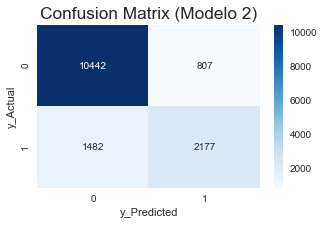

In [80]:
#Matriz de confusión
m_confusion = confusion_matrix(y_test2, yhat2)
ax = plt.subplot()
sns.heatmap(m_confusion, annot=True, cmap='Blues', ax = ax, fmt='g');
ax.set_xlabel('y_Predicted');ax.set_ylabel('y_Actual');
ax.set_title('Confusion Matrix (Modelo 2)', size='xx-large');
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [81]:
# Reporto las métricas para las clases
print(classification_report(y_test2, yhat2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11249
           1       0.73      0.59      0.66      3659

    accuracy                           0.85     14908
   macro avg       0.80      0.76      0.78     14908
weighted avg       0.84      0.85      0.84     14908



In [82]:
# Grafico la curva ROC
false_positive2, true_positive2, threshold2 = roc_curve(y_test2, yhat_pr2[:,1])
plt.plot(false_positive2, true_positive2, lw=1)
plt.plot([0,1], linestyle='--', lw=1, color='crimson')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
plt.title(f'AUC = {round(roc_auc_score(y_test2, yhat_pr2[:,1]),3)}')

Text(0.5, 1.0, 'AUC = 0.899')

__Comentario:__ Los resultados son casi idénticos a los del modelo 1.

##### Modelo 3

Para este modelo modificaremos los hiperparámetros utilizando las variables con mejor ajuste al vector objetivo.

In [83]:
# Primero estandarizaremos la matriz de atributos
df_std3 = StandardScaler().fit_transform(df_2.loc[:,'age':'region_Asia'])
df_std3

array([[-1.02580119, -1.22243981, -0.14681116, ...,  3.11243452,
        -0.69382303, -0.15274882],
       [-0.04208565, -0.43865216, -0.14681116, ..., -0.3212919 ,
        -0.69382303, -0.15274882],
       [-0.79878991,  0.73702932, -0.14681116, ..., -0.3212919 ,
        -0.69382303, -0.15274882],
       ...,
       [ 1.47132286, -0.43865216, -0.14681116, ..., -0.3212919 ,
         1.44128973, -0.15274882],
       [-1.25281247, -0.43865216, -0.14681116, ..., -0.3212919 ,
        -0.69382303, -0.15274882],
       [ 1.01730031, -0.43865216,  1.85367705, ..., -0.3212919 ,
         1.44128973, -0.15274882]])

In [84]:
# Genero los subconjuntos de entrenamiento
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_std3,
                                                   final_df['income_recod'],
                                                   test_size=.33,
                                                   random_state=16254)

In [85]:
# Implemento el modelo modificando los hiperparámetros
def_model3 = LogisticRegression(C=3.0).fit(X_train3, y_train3)

In [86]:
# Los coeficientes de cada variable
def_model3.coef_

array([[ 0.33456543,  0.7647321 ,  2.39332819,  0.26654241,  0.35781857,
         0.07236075, -0.11265692, -0.13262502, -0.1512723 , -0.28858181,
        -0.61496485, -0.39900972, -0.2942922 , -0.23306602,  0.20216375,
        -0.36506035, -0.6670223 , -0.44205019, -0.07246665, -0.07398104,
        -0.33618742, -0.02697094]])

In [87]:
# Genero las predicciones de clases
yhat3 = def_model3.predict(X_test3)
yhat3

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
# Genero las predicciones de probabilidad
yhat_pr3 = def_model3.predict_proba(X_test3)
yhat_pr3

array([[0.89589418, 0.10410582],
       [0.95268589, 0.04731411],
       [0.75988812, 0.24011188],
       ...,
       [0.88253329, 0.11746671],
       [0.97112751, 0.02887249],
       [0.65415755, 0.34584245]])

In [89]:
#Matriz de confusión
m_confusion = confusion_matrix(y_test3, yhat3)
ax = plt.subplot()
sns.heatmap(m_confusion, annot=True, cmap='Blues', ax = ax, fmt='g');
ax.set_xlabel('y_Predicted');ax.set_ylabel('y_Actual');
ax.set_title('Confusion Matrix (Modelo 3)', size='xx-large');
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [90]:
# Reporto las métricas para las clases
print(classification_report(y_test3, yhat3))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11249
           1       0.73      0.59      0.66      3659

    accuracy                           0.85     14908
   macro avg       0.80      0.76      0.78     14908
weighted avg       0.84      0.85      0.84     14908



Text(0.5, 1.0, 'AUC = 0.899')

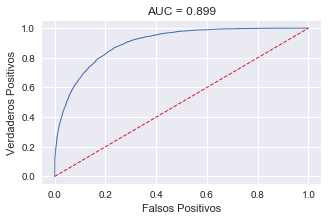

In [91]:
# Grafico la curva ROC
false_positive3, true_positive3, threshold3 = roc_curve(y_test3, yhat_pr3[:,1])
plt.plot(false_positive3, true_positive3, lw=1)
plt.plot([0,1], linestyle='--', lw=1, color='crimson')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
plt.title(f'AUC = {round(roc_auc_score(y_test3, yhat_pr3[:,1]),3)}')

__Comentarios:__ Los resultados son muy similares.

____

__Resultados:__ A continuación se mostrarán los resultados de los tres modelos para poder compararlos

In [92]:
print("------------------------------------------------------\nModelo 1")
print(classification_report(y_test1, yhat1))
print("------------------------------------------------------\nModelo 2")
print(classification_report(y_test2, yhat2))
print("------------------------------------------------------\nModelo 3")
print(classification_report(y_test3, yhat3))

------------------------------------------------------
Modelo 1
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11249
           1       0.73      0.59      0.65      3659

    accuracy                           0.85     14908
   macro avg       0.80      0.76      0.78     14908
weighted avg       0.84      0.85      0.84     14908

------------------------------------------------------
Modelo 2
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11249
           1       0.73      0.59      0.66      3659

    accuracy                           0.85     14908
   macro avg       0.80      0.76      0.78     14908
weighted avg       0.84      0.85      0.84     14908

------------------------------------------------------
Modelo 3
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11249
           1       0.73      0.59      0.66  

Text(0.5, 1.0, 'Curva ROC comparativa')

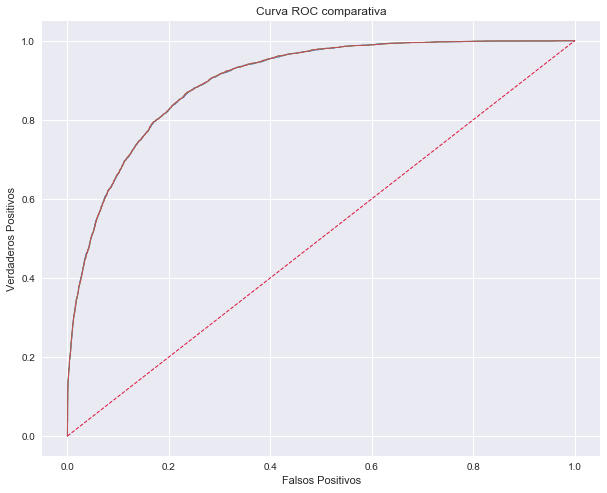

In [93]:
# Grafico la curva ROC
plt.figure(figsize=(10,8))
false_positive1, true_positive1, threshold1 = roc_curve(y_test1, yhat_pr1[:,1])
plt.plot(false_positive1, true_positive1, lw=1)

false_positive2, true_positive2, threshold2 = roc_curve(y_test2, yhat_pr2[:,1])
plt.plot(false_positive2, true_positive2, lw=1)

false_positive3, true_positive3, threshold3 = roc_curve(y_test3, yhat_pr3[:,1])
plt.plot(false_positive3, true_positive3, lw=1)

plt.plot([0,1], linestyle='--', lw=1, color='crimson')
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
plt.title('Curva ROC comparativa')

__Conclusión:__ Podemos determinar que el mejor modelo es el modelo 2, ya que utiliza menos variables y no necesita modificaciones de los hiperparámetros, obteniendo casi el mismo desempeño.